In [14]:
!pip install seaborn
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import seaborn as sns # for correlation heatmap

from xgboost import XGBRegressor

from models import *
from util import *

In [2]:
#boston = load_boston()
#X = pd.DataFrame(boston.data, columns=boston.feature_names)
#y = boston.target
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

ntfm_tsfresh = get_problem_features()
ntfm_catch22 = get_problem_features('m4-catch22features.csv')
ntfm = ntfm_tsfresh.join(ntfm_catch22)

pdf = get_problem_algorithm_performance()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()

X = ntfm.to_numpy()
Y = pdf.to_numpy()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2002)

y_train = Y_train[:, 0]
y_test = Y_test[:, 0]


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
def XGBFeatureImportance(X_train, X_test, y_train, y_test, column_names=None):
    xgb = XGBRegressor(n_estimators=100)
    xgb.fit(X_train, y_train)
    if column_names is None:
        return xgb.feature_importances_
    else:
        return sorted(list(zip(list(xgb.feature_importances_), column_names)), reverse=True)

In [19]:
features = XGBFeatureImportance(X_train, X_test, y_train, y_test, column_names=ntfm.columns)

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


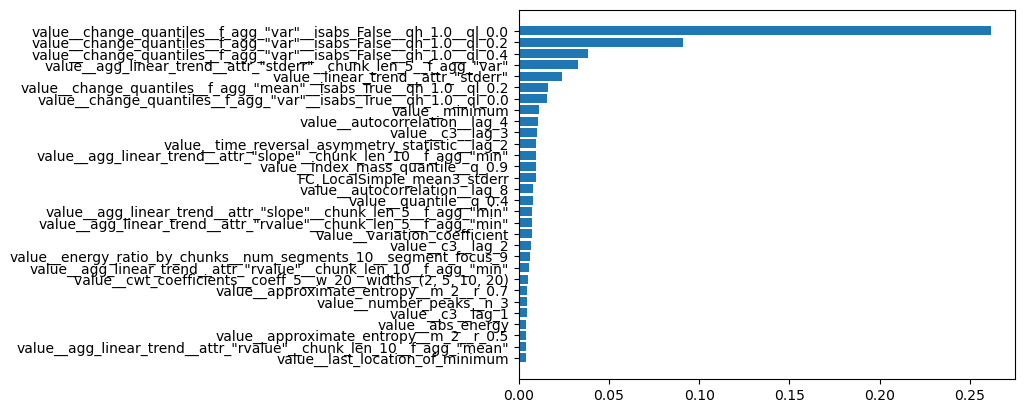

In [22]:
def feature_importance_plot(feature_importance):
    plt.rcdefaults()
    fig, ax = plt.subplots()

    labels = [x[1] for x in feature_importance]
    y_pos = np.arange(len(labels))
    performance = [x[0] for x in feature_importance]

    ax.barh(y_pos, performance)
    ax.set_yticks(y_pos, labels=labels)
    ax.invert_yaxis() 
    plt.show()
    
feature_importance_plot(features[:30])

In [25]:
def PermutationImportanceImportance(X_train, X_test, y_train, y_test, column_names=None):
    xgb = XGBRegressor(n_estimators=100)
    xgb.fit(X_train, y_train)
    perm_importance = permutation_importance(xgb, X_test, y_test, n_repeats=20, n_jobs=-1)
    if column_names is None:
        return perm_importance.importances_mean
    else:
        return sorted(list(zip(list(perm_importance.importances_mean), column_names)), reverse=True)

In [26]:
features = PermutationImportanceImportance(X_train, X_test, y_train, y_test, column_names=ntfm.columns)

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


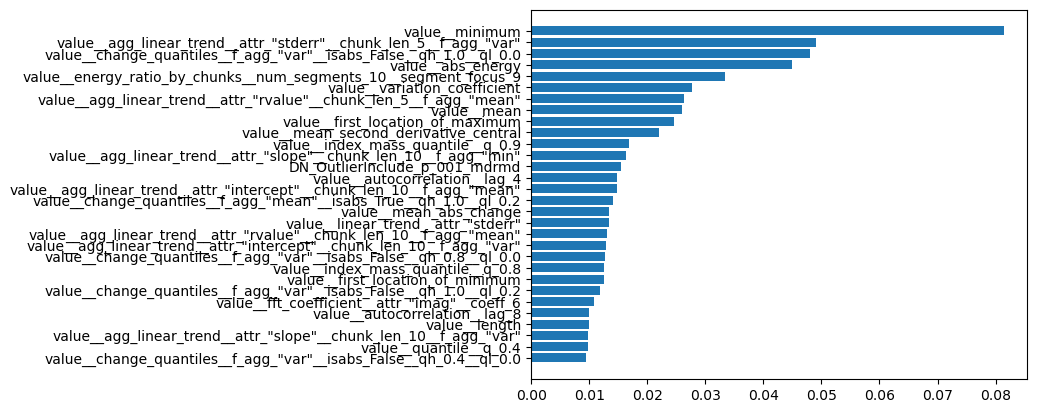

In [27]:
feature_importance_plot(features[:30])

In [ ]:
features

In [ ]:
from sklearn.ensemble import RandomForestRegressor

feature_names = ntfm.columns
forest = RandomForestRegressor(random_state=0, n_estimators=10)
forest.fit(X_train, y_train)

In [ ]:
sorted(list(zip(list(forest.feature_importances_), ntfm.columns)), reverse=True)

In [29]:
xgb = XGBRegressor(n_estimators=100)
xgb.fit(X_train, y_train)

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=48, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)